In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_df=sns.load_dataset("iris")

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
iris_df.duplicated().sum()

1

In [6]:
iris_df.drop_duplicates(inplace=True)

In [7]:
iris_df.duplicated().sum()

0

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
enc=LabelEncoder()

In [10]:
iris_df["species"]=enc.fit_transform(iris_df['species'])

In [11]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


<Axes: >

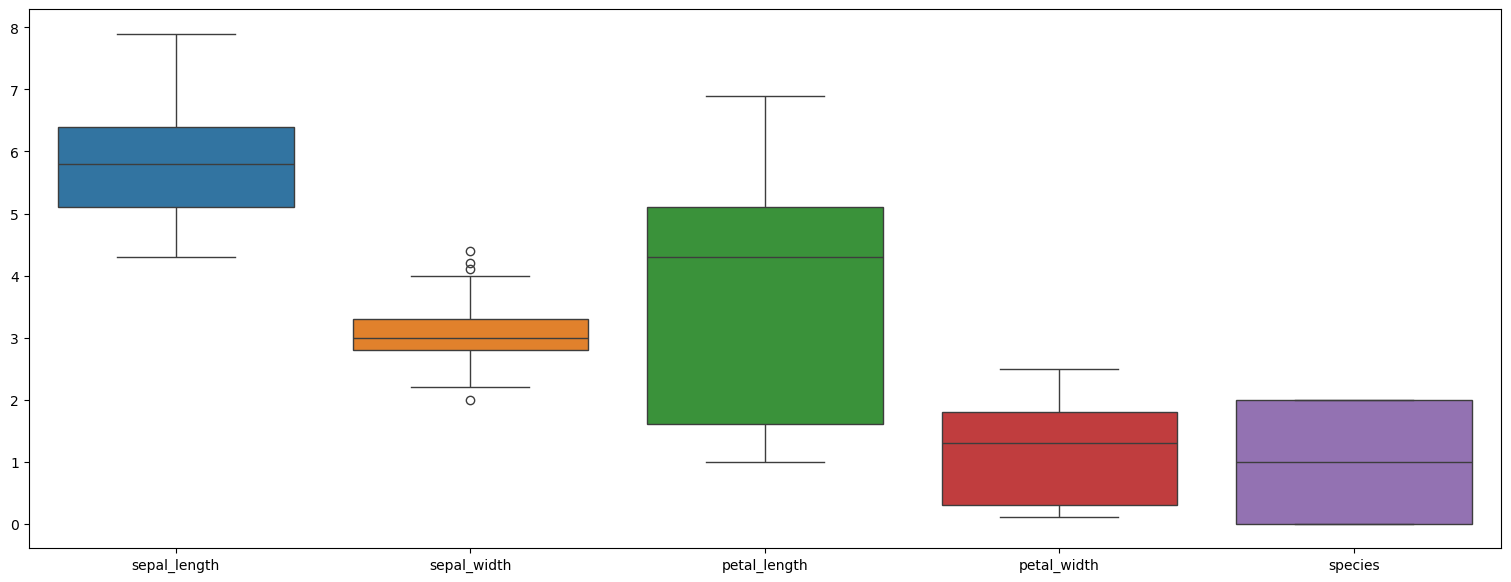

In [13]:
plt.figure(figsize=(19,7))
sns.boxplot(iris_df)

In [14]:
q1=iris_df.quantile(0.25)
q3=iris_df.quantile(0.75)
iqr=q3-q1
iqr

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
species         2.0
dtype: float64

In [15]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul,ll

(sepal_length     8.35
 sepal_width      4.05
 petal_length    10.35
 petal_width      4.05
 species          5.00
 dtype: float64,
 sepal_length    3.15
 sepal_width     2.05
 petal_length   -3.65
 petal_width    -1.95
 species        -3.00
 dtype: float64)

In [16]:
iris_df=iris_df[-((iris_df>ul)|(iris_df<ll)).any(axis=1)]

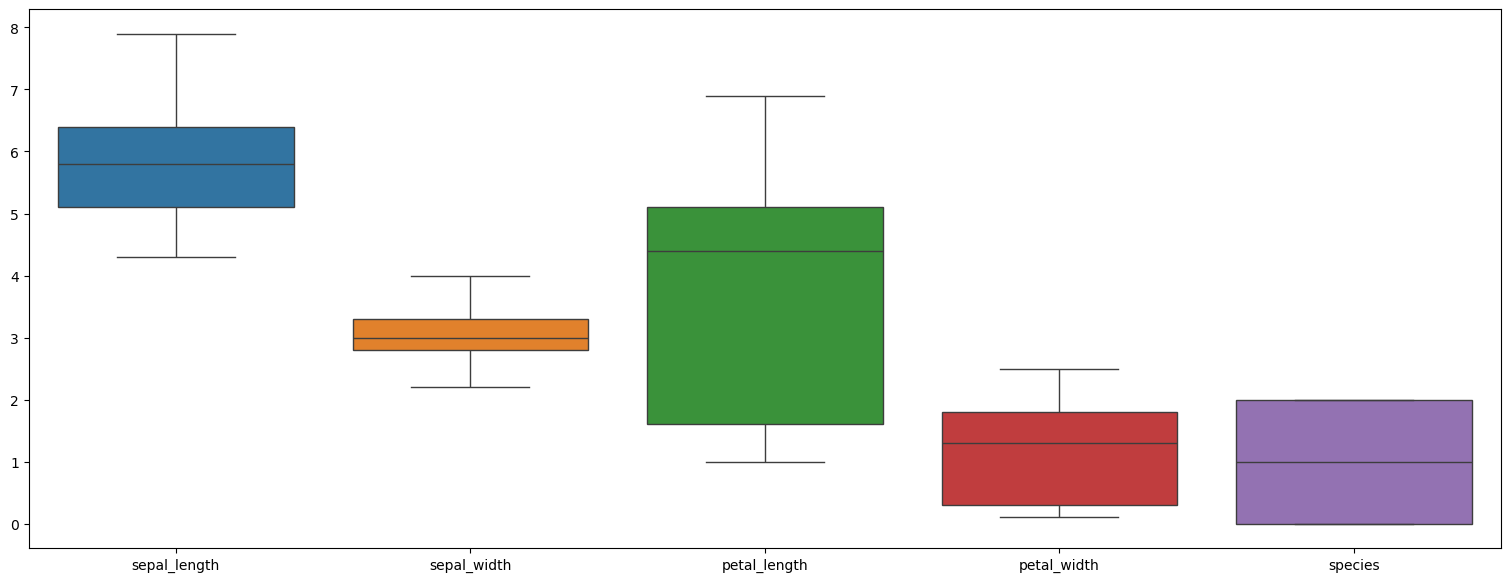

In [17]:
plt.figure(figsize=(19,7))
sns.boxplot(iris_df)
plt.show()

In [18]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  145 non-null    float64
 1   sepal_width   145 non-null    float64
 2   petal_length  145 non-null    float64
 3   petal_width   145 non-null    float64
 4   species       145 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.2 KB


In [19]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.857241,3.042759,3.797931,1.215862,1.013793
std,0.836971,0.398216,1.760819,0.759905,0.816379
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.000000,6.900000,2.500000,2.000000


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x=iris_df.drop(columns=['species'])
y=iris_df['species']

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=17)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
clf=DecisionTreeClassifier(random_state=17)

In [42]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=17)

In [44]:
ypred=clf.predict(xtest)

In [53]:
acc=sklearn.metrics.accuracy_score(ytest,ypred)

In [55]:
acc

0.9655172413793104

In [57]:
from sklearn.tree import plot_tree

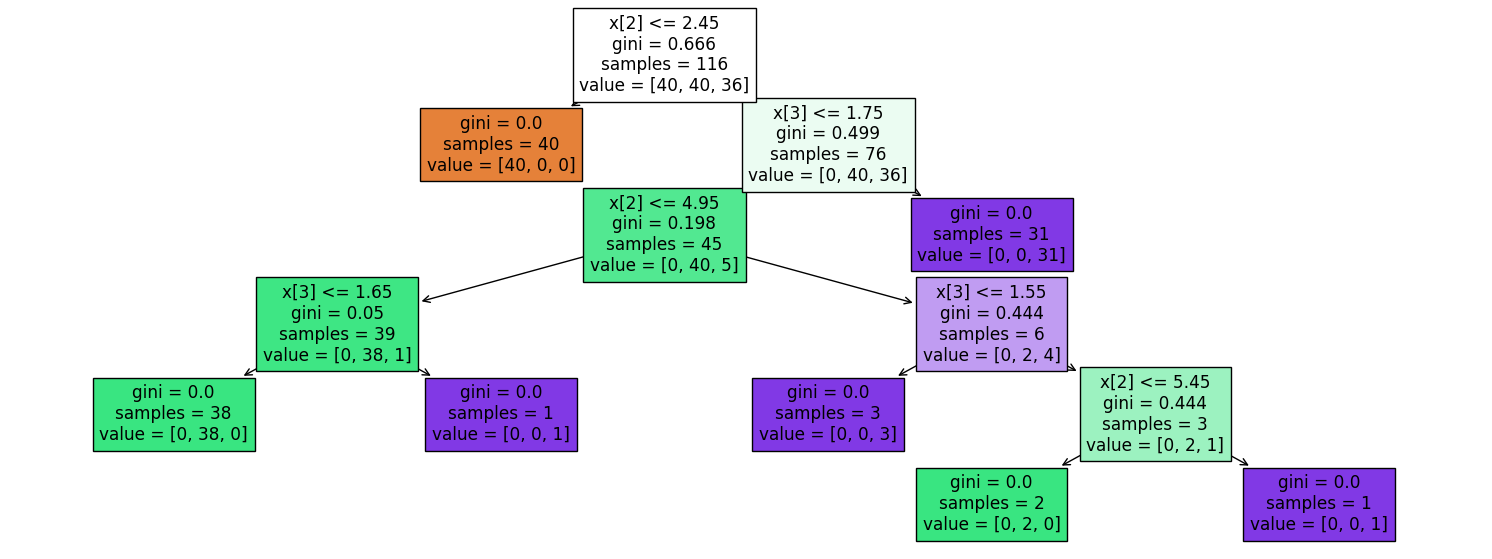

In [63]:
plt.figure(figsize=(19,7))
plot_tree(clf,filled=True)
plt.show()